This study is based on the article written by Matt Clarke. The link to the article is provided below.

Applications of causal impact modeling in marketing
https://practicaldatascience.co.uk/machine-learning/how-to-infer-the-effects-of-marketing-using-the-causal-impact-model


- I discovered this model when I was looking for methods to effectively track the impact of TV ad and offline campagin on lead generation and member conversion where we cannot gether data from.

- This model was published by Brodersen and his colleagues in 2015 in 2015 in a R package called CausalImpact designed to allow marketers to run their algorithm and predict causal impact from time series data. In recent years, this has been ported to Python

- This model can be used to analyze the impact of certain changes you have made to your product, site features, and campagin etc. when experiment (such as A/B test) is not feasible

## Potential applications for this in e-commerce and marketing:

- SEO testing: Did changes made to the site have a statistically significant impact upon SEO?
- Price changes: Has a change in price had a positive or negative impact upon a specific metric?
- Site features: Did the addition or removal of a site feature have an impact upon the site performance?
- Promotional campaigns: Did a promotion starting or ending have a significant impact on sales?

In [1]:
!pip3 install pycausalimpact

In [2]:
import pandas as pd
from causalimpact import CausalImpact

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/flyandlure/datasets/master/causal_impact_dataset.csv')
df.head()

,date,clicks,impressions,ctr,position
0,2021-07-04,136,6301,2.16,31.97
1,2021-07-05,264,8697,3.04,27.66
2,2021-07-06,299,9236,3.24,26.38
3,2021-07-07,276,10008,2.76,26.77
4,2021-07-08,283,9725,2.91,25.83


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         28 non-null     object 
 1   clicks       28 non-null     int64  
 2   impressions  28 non-null     int64  
 3   ctr          28 non-null     float64
 4   position     28 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.2+ KB


PyCausalImpact requires the dataframe to be in a datetime format in order to work as it is based on time serises analysis, so we need to make some minor changes to this before we pass it to the model.

In [5]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

,clicks,impressions,ctr,position
date,,,,
2021-07-04,136,6301,2.16,31.97
2021-07-05,264,8697,3.04,27.66
2021-07-06,299,9236,3.24,26.38
2021-07-07,276,10008,2.76,26.77
2021-07-08,283,9725,2.91,25.83


## Define the pre-period and post-period dates

pre_period (this dataset is used to train our model): 
- start date:the earliest date in the dataframe (2021-07-04), if you want to isolate the effect of specific campaign, pick the   earlist day that no other campagin is going on

- end date: the day before the site change was made

post_period: contains the date reflecting the day the change was made, plus the end date for this period.

Important note: the detetime data should be store in list 

In [6]:
pre_period = ['2021-07-04', '2021-07-17'] # prior to the change
post_period = ['2021-07-18', '2021-07-31'] # post to the change

## Fit the CausalImpact model
- pass in the dataframe column containing the metric we want to examine

- in this case, we use clicks as metric and you can change to other metric you want to measure the effect of your change according to your objective

In [7]:
model = CausalImpact(df['clicks'], pre_period, post_period)

C:\Users\ll3371\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


## Examining the model outputs

- we can have a overview of the result using the build-in function (report) of the model

In [8]:
print(model.summary(output='report'))

Analysis report {CausalImpact}


During the post-intervention period, the response variable had
an average value of approx. 344.36. By contrast, in the absence of an
intervention, we would have expected an average response of 243.01.
The 95% interval of this counterfactual prediction is [186.8, 299.77].
Subtracting this prediction from the observed response yields
an estimate of the causal effect the intervention had on the
response variable. This effect is 101.35 with a 95% interval of
[44.58, 157.56]. For a discussion of the significance of this effect,
see below.


Summing up the individual data points during the post-intervention
period (which can only sometimes be meaningfully interpreted), the
response variable had an overall value of 4821.0.
By contrast, had the intervention not taken place, we would have expected
a sum of 3402.13. The 95% interval of this prediction is [2615.15, 4196.82].


The above results are given in terms of absolute numbers. In relative
terms, the respons

In [9]:
print(model.summary())

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    344.36             4821.0
Prediction (s.d.)         243.01 (28.82)     3402.13 (403.49)
95% CI                    [186.8, 299.77]    [2615.15, 4196.82]

Absolute effect (s.d.)    101.35 (28.82)     1418.87 (403.49)
95% CI                    [44.58, 157.56]    [624.18, 2205.85]

Relative effect (s.d.)    41.71% (11.86%)    41.71% (11.86%)
95% CI                    [18.35%, 64.84%]   [18.35%, 64.84%]

Posterior tail-area probability p: 0.0
Posterior prob. of a causal effect: 100.0%

For more details run the command: print(impact.summary('report'))


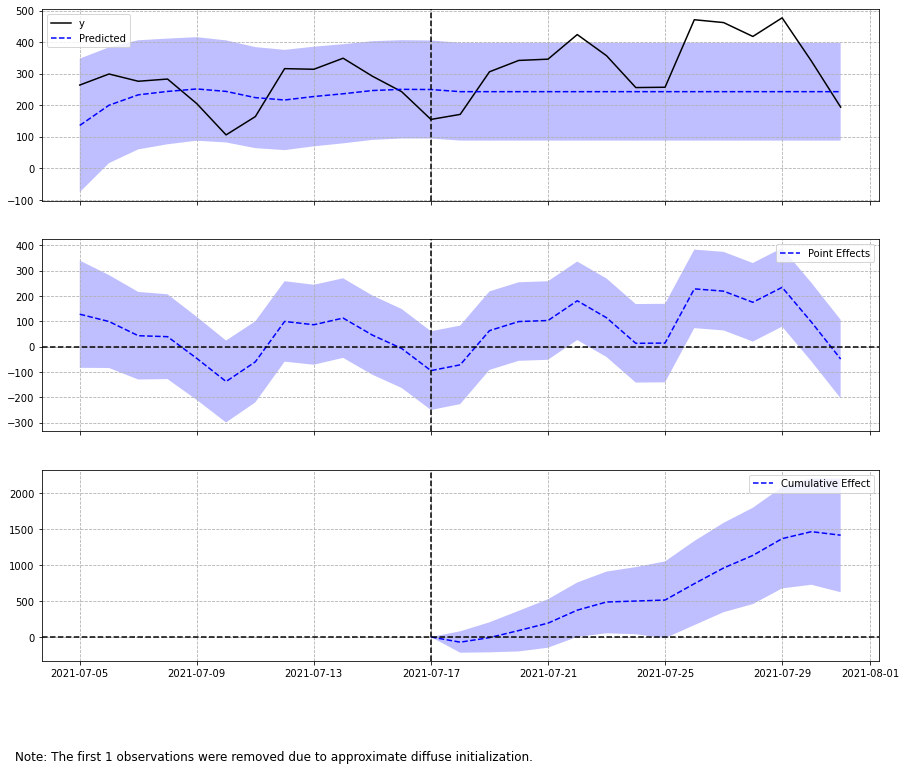

In [13]:
model.plot()

- The blue dot line in first panel shows what would happend if we had not carry the action from 2021-07-17 to 2021-08-01
- The black solid line is the real observed data after the action is taken from 2021-07-17 to 2021-08-01
- The estimated data points are structred with Bayesian structural time series model for posteriror inference


- The second panel shows the diffrence between your observed data and the counterfactual estimate, that is, the point wise causual effect


- The third panel shows the cumulative causual effect resulting from adding up all the flow quantities, in this case, the sum of clicks

In [11]:
#all the raw data behind the plot
model.inferences.head()

,post_cum_y,preds,post_preds,post_preds_lower,post_preds_upper,preds_lower,preds_upper,post_cum_pred,post_cum_pred_lower,post_cum_pred_upper,point_effects,point_effects_lower,point_effects_upper,post_cum_effects,post_cum_effects_lower,post_cum_effects_upper
date,,,,,,,,,,,,,,,,
2021-07-04,NaN,243.000000,NaN,NaN,NaN,-144088.925913,144574.925913,NaN,NaN,NaN,-107.000000,-144438.925913,144224.925913,NaN,NaN,NaN
2021-07-05,NaN,136.000115,NaN,NaN,NaN,-75.819323,347.819553,NaN,NaN,NaN,127.999885,-83.819553,339.819323,NaN,NaN,NaN
2021-07-06,NaN,200.002087,NaN,NaN,NaN,16.559068,383.445105,NaN,NaN,NaN,98.997913,-84.445105,282.440932,NaN,NaN,NaN
2021-07-07,NaN,233.004926,NaN,NaN,NaN,60.051323,405.958529,NaN,NaN,NaN,42.995074,-129.958529,215.948677,NaN,NaN,NaN
2021-07-08,NaN,243.756117,NaN,NaN,NaN,76.292709,411.219526,NaN,NaN,NaN,39.243883,-128.219526,206.707291,NaN,NaN,NaN
